<a href="https://colab.research.google.com/github/Rrivn/Economic-information-systems/blob/main/Python%26Excel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Начнем с создания таблицы данных, выполнения вычислений и построения визуализаций.**

**Пример таблицы расходов (Данные) **

Создадим данные в следующем формате:
Члены семьи: Имена членов семьи.
Статьи расходов: Например, "Еда", "Жильё", "Транспорт", "Развлечения".
Даты: Периоды расчёта.
Суммы расходов: Значения расходов.

**Выполним это на Python:**




In [ ]:
#Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Создание примера данных
data = {
    'Дата': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'Член семьи': np.random.choice(['Алексей', 'Мария', 'Дмитрий', 'Общие'], size=10),
    'Статья расходов': np.random.choice(['Еда', 'Жильё', 'Транспорт', 'Развлечения'], size=10),
    'Сумма': np.random.randint(100, 1000, size=10)
}

df = pd.DataFrame(data)

# Сохраняем таблицу для анализа
print(df)

# Вычисление общей суммы расходов
total_expenses = df['Сумма'].sum()

# Расходы по членам семьи
family_expenses = df.groupby('Член семьи')['Сумма'].sum()

# Расходы по статьям
category_expenses = df.groupby('Статья расходов')['Сумма'].sum()

# Печать результатов
print(f"Общая сумма расходов: {total_expenses}")
print(f"Расходы по членам семьи:\n{family_expenses}")
print(f"Расходы по статьям:\n{category_expenses}")

        Дата Член семьи Статья расходов  Сумма
0 2024-01-01      Мария     Развлечения    218
1 2024-01-02    Дмитрий     Развлечения    437
2 2024-01-03      Общие             Еда    374
3 2024-01-04    Алексей       Транспорт    890
4 2024-01-05    Дмитрий       Транспорт    867
5 2024-01-06    Дмитрий     Развлечения    340
6 2024-01-07      Общие           Жильё    420
7 2024-01-08      Общие             Еда    322
8 2024-01-09    Алексей             Еда    636
9 2024-01-10      Общие       Транспорт    279
Общая сумма расходов: 4783
Расходы по членам семьи:
Член семьи
Алексей    1526
Дмитрий    1644
Мария       218
Общие      1395
Name: Сумма, dtype: int64
Расходы по статьям:
Статья расходов
Еда            1332
Жильё           420
Развлечения     995
Транспорт      2036
Name: Сумма, dtype: int64


**Визуализация:**

Круговая диаграмма для расходов по членам семьи.
Круговая диаграмма для расходов по статьям.

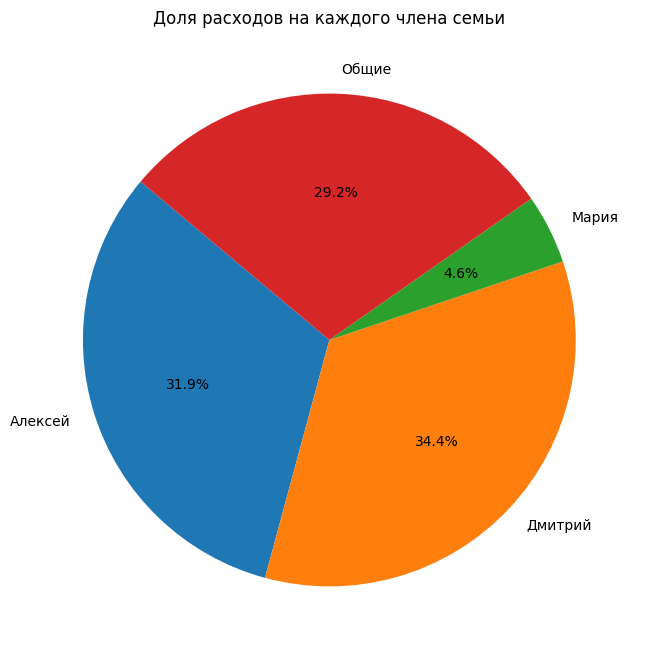

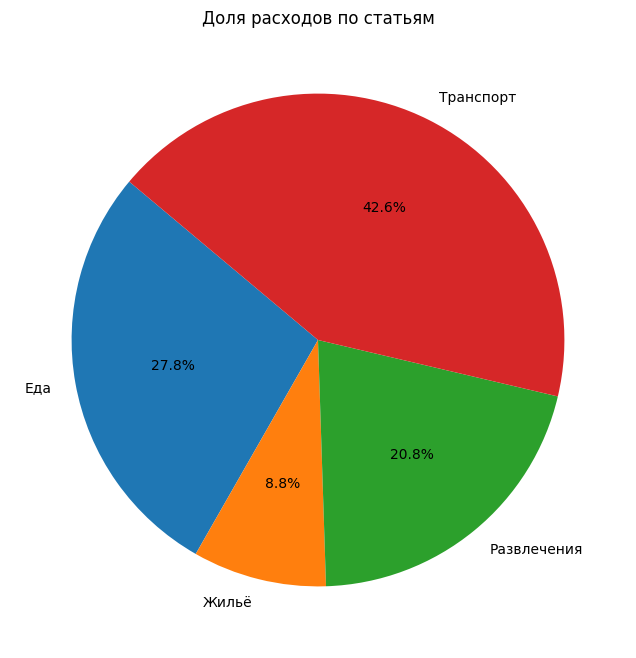

In [ ]:
# Круговая диаграмма по членам семьи
plt.figure(figsize=(8, 8))#Создаем фигуру размером 8 на 8
plt.pie(family_expenses, labels=family_expenses.index, autopct='%1.1f%%', startangle=140)#Создаем круговую диаграмму для расходов семьи
plt.title('Доля расходов на каждого члена семьи')#Устанавливаем заголовок
plt.show()#Показываем диаграмму

# Круговая диаграмма по статьям расходов
plt.figure(figsize=(8, 8))#Создаем фигуру размером 8 на 8
plt.pie(category_expenses, labels=category_expenses.index, autopct='%1.1f%%', startangle=140)#Создаем круговую диаграмму для расходов семьи
plt.title('Доля расходов по статьям')#Устанавливаем заголовок
plt.show()#Показываем диаграмму

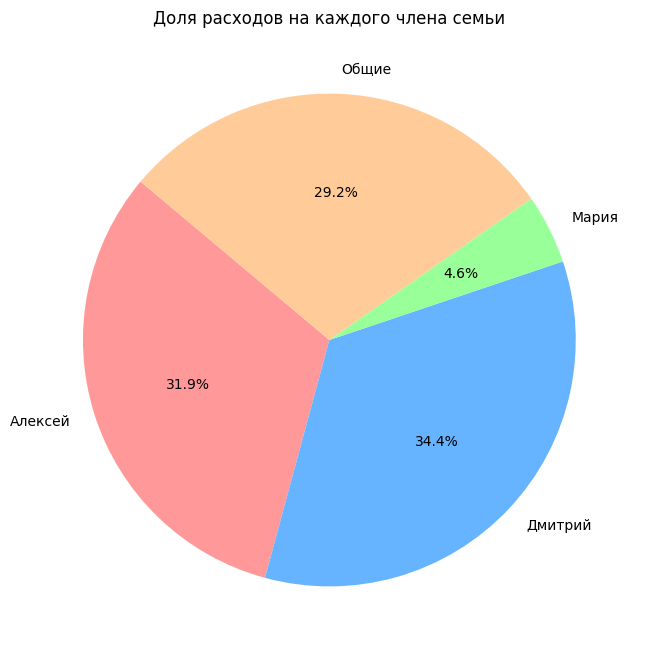

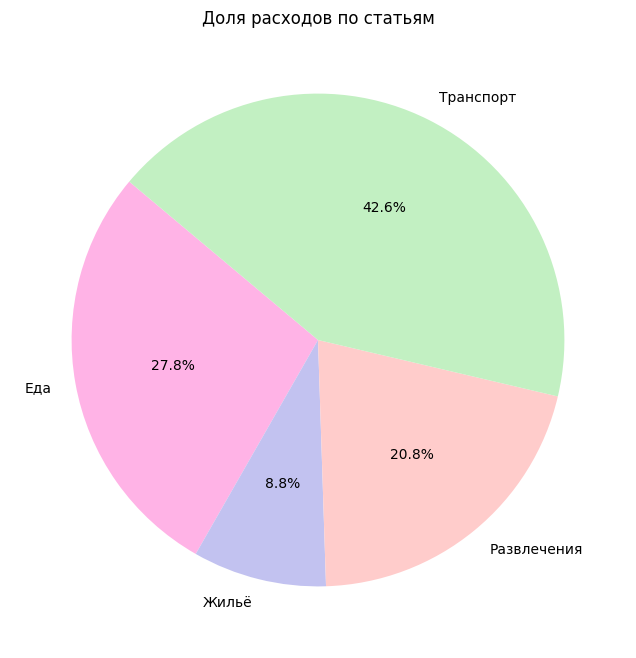

In [ ]:
import matplotlib.pyplot as plt

# Задаем цвета для членов семьи
family_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Пример цветов в формате HEX

# Круговая диаграмма по членам семьи
plt.figure(figsize=(8, 8))  # Создаем фигуру размером 8 на 8
plt.pie(family_expenses, labels=family_expenses.index, autopct='%1.1f%%', startangle=140, colors=family_colors)  # Добавляем цвета
plt.title('Доля расходов на каждого члена семьи')  # Устанавливаем заголовок
plt.show()  # Показываем диаграмму

# Задаем цвета для статей расходов
category_colors = ['#ffb3e6', '#c2c2f0', '#ffcccb', '#c2f0c2']  # Пример цветов в формате HEX

# Круговая диаграмма по статьям расходов
plt.figure(figsize=(8, 8))  # Создаем фигуру размером 8 на 8
plt.pie(category_expenses, labels=category_expenses.index, autopct='%1.1f%%', startangle=140, colors=category_colors)  # Добавляем цвета
plt.title('Доля расходов по статьям')  # Устанавливаем заголовок
plt.show()  # Показываем диаграмму

Для анализа "Таблица 2: расходы на каждого члена семьи по статьям", потребуется:

Построить сводную таблицу, которая показывает, сколько каждый член семьи потратил на каждую статью расходов.
Выполнить визуализацию: гистограммы или тепловая карта для лучшего представления данных.
Далее выполняется шаг за шагом:

1. Формирование таблицы данных На основании предыдущей структуры данных, мы строим сводную таблицу, группируя расходы по членам семьи и статьям.

In [ ]:
# Создание сводной таблицы расходов на каждого члена семьи по статьям
pivot_table = df.pivot_table(
    values='Сумма',
    index='Член семьи',
    columns='Статья расходов',
    aggfunc='sum',
    fill_value=0
)

# Отображение сводной таблицы
print("Сводная таблица: Расходы на каждого члена семьи по статьям")
print(pivot_table)

Сводная таблица: Расходы на каждого члена семьи по статьям
Статья расходов  Еда  Жильё  Развлечения  Транспорт
Член семьи                                         
Алексей          636      0            0        890
Дмитрий            0      0          777        867
Мария              0      0          218          0
Общие            696    420            0        279


**Визуализация данных**

Гистограмма: для сравнения расходов членов семьи по статьям.
Тепловая карта: для анализа концентрации расходов.
Визуализация гистограммы:

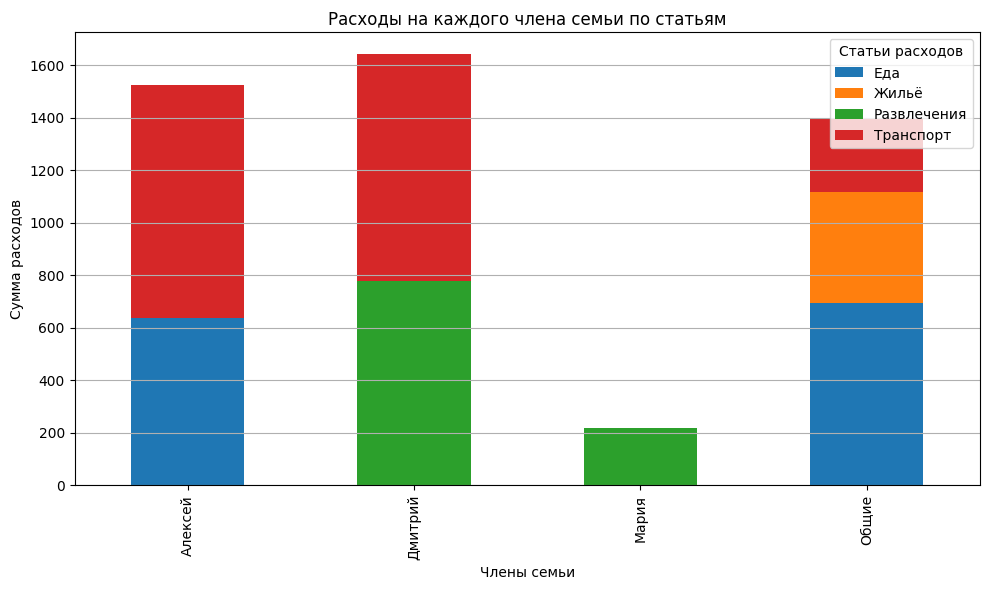

In [ ]:
# Построение гистограммы
pivot_table.plot(kind='bar', figsize=(10, 6), stacked=True)#Cтроим столбчатую диаграмму
plt.title('Расходы на каждого члена семьи по статьям')#Устанавливаем заголовок для графика
plt.xlabel('Члены семьи')#Устанавливаем метку по оси Х
plt.ylabel('Сумма расходов')#Устанавливаем метку по оси У
plt.legend(title='Статьи расходов')#Добавляем легенду с заголовком для обозначения статей расходов
plt.grid(axis='y')#Включаем сетку по оси У
plt.tight_layout()#Автоматически подгоняем параметры макета,чтобы избежать наложений
plt.show()#Показываем построенный график

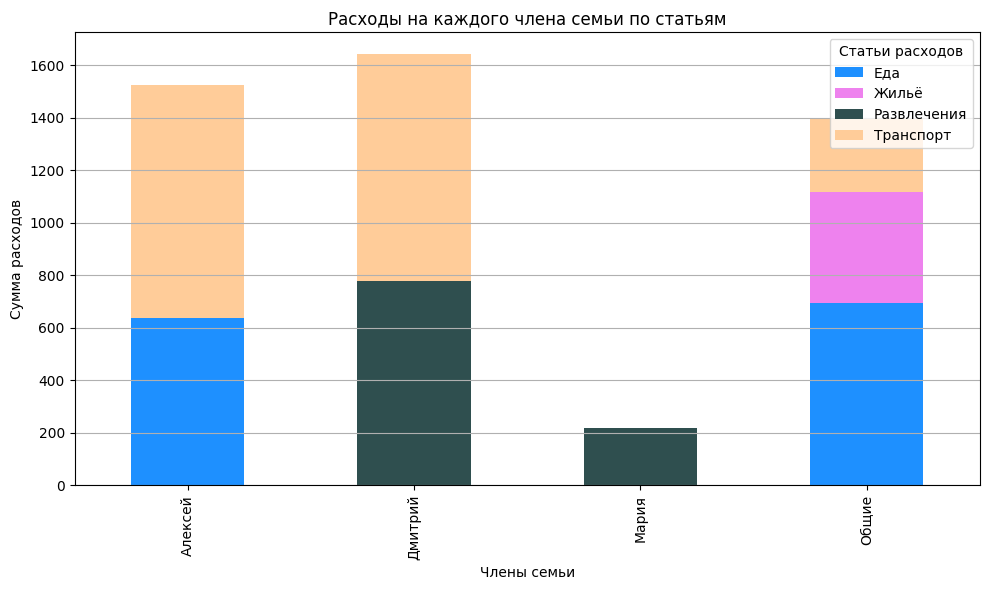

In [ ]:
import matplotlib.pyplot as plt

# Задаем цвета для столбчатой диаграммы
bar_colors = ['#1E90FF', '#EE82EE', '#2F4F4F', '#ffcc99']  # Пример цветов в формате HEX

# Построение гистограммы
pivot_table.plot(kind='bar', figsize=(10, 6), stacked=True, color=bar_colors)  # Добавляем цвета
plt.title('Расходы на каждого члена семьи по статьям')  # Устанавливаем заголовок для графика
plt.xlabel('Члены семьи')  # Устанавливаем метку по оси Х
plt.ylabel('Сумма расходов')  # Устанавливаем метку по оси У
plt.legend(title='Статьи расходов')  # Добавляем легенду с заголовком для обозначения статей расходов
plt.grid(axis='y')  # Включаем сетку по оси У
plt.tight_layout()  # Автоматически подгоняем параметры макета, чтобы избежать наложений
plt.show()  # Показываем построенный график

**Визуализация тепловой карты:**

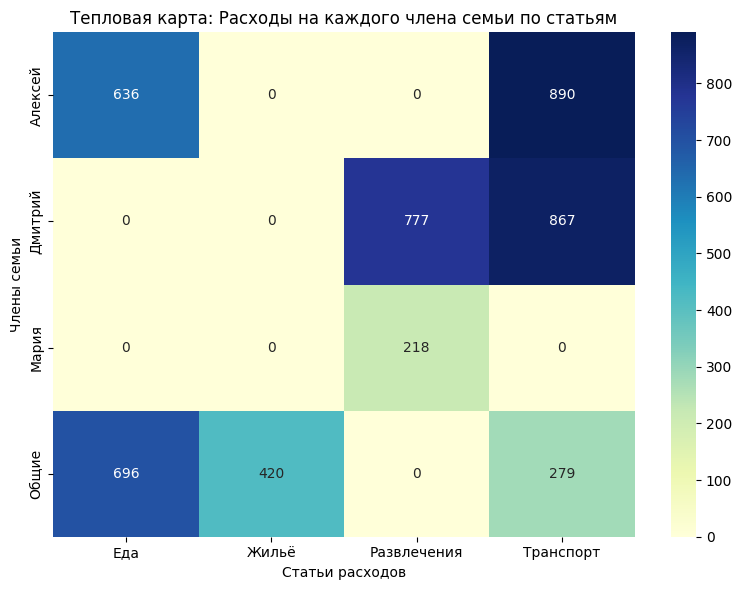

In [ ]:
import seaborn as sns#Импорт необходимой библиотеки

# Построение тепловой карты
plt.figure(figsize=(8, 6))#Построение фигуры размером 8 на 6
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")#Строим тепловую карту
plt.title('Тепловая карта: Расходы на каждого члена семьи по статьям')#Установить заголовок
plt.xlabel('Статьи расходов')#Устанавливаем метку по оси Х
plt.ylabel('Члены семьи')#Устанавливаем метку по оси У
plt.tight_layout()#Автоматически подгоняем параметры макета,чтобы избежать наложения
plt.show()#Показываем построенную карту

**Вывод результатов:**

Сводная таблица представила детальную разбивку расходов по членам семьи и статьям.
Гистограмма позволяет визуально оценить долю расходов каждого члена семьи по различным категориям.

**Таблица 3: Расходы по статьям с детализацией**

В этой таблице необходимо показать подробный анализ статей расходов. Для каждой статьи расходов выполняются следующие действия:

Группировка расходов по статьям и датам.
Расчет суммы расходов для каждой статьи в определенные периоды.
Визуализация данных для выявления трендов по расходам.

**Шаги реализации:**

**1. Сбор и группировка данных**

Для выполнения задач создадим сводную таблицу, которая объединит расходы по статьям и датам.

In [ ]:
# Группировка расходов по статьям и датам
detailed_expenses = df.groupby(['Дата', 'Статья расходов'])['Сумма'].sum().reset_index()

# Переход к сводной таблице для удобства анализа
pivot_detailed = detailed_expenses.pivot_table(
    values='Сумма',
    index='Дата',
    columns='Статья расходов',
    aggfunc='sum',
    fill_value=0
)

# Отображение таблицы
print("Таблица 3: Расходы по статьям с детализацией")
print(pivot_detailed)

Таблица 3: Расходы по статьям с детализацией
Статья расходов  Еда  Жильё  Развлечения  Транспорт
Дата                                               
2024-01-01         0      0          218          0
2024-01-02         0      0          437          0
2024-01-03       374      0            0          0
2024-01-04         0      0            0        890
2024-01-05         0      0            0        867
2024-01-06         0      0          340          0
2024-01-07         0    420            0          0
2024-01-08       322      0            0          0
2024-01-09       636      0            0          0
2024-01-10         0      0            0        279


**2. Визуализация данных**

Для анализа трендов расходов по статьям используем:

Линейные графики: для анализа изменения расходов с течением времени.

Гистограммы: для сравнения расходов в разные даты.

Построение линейного графика:

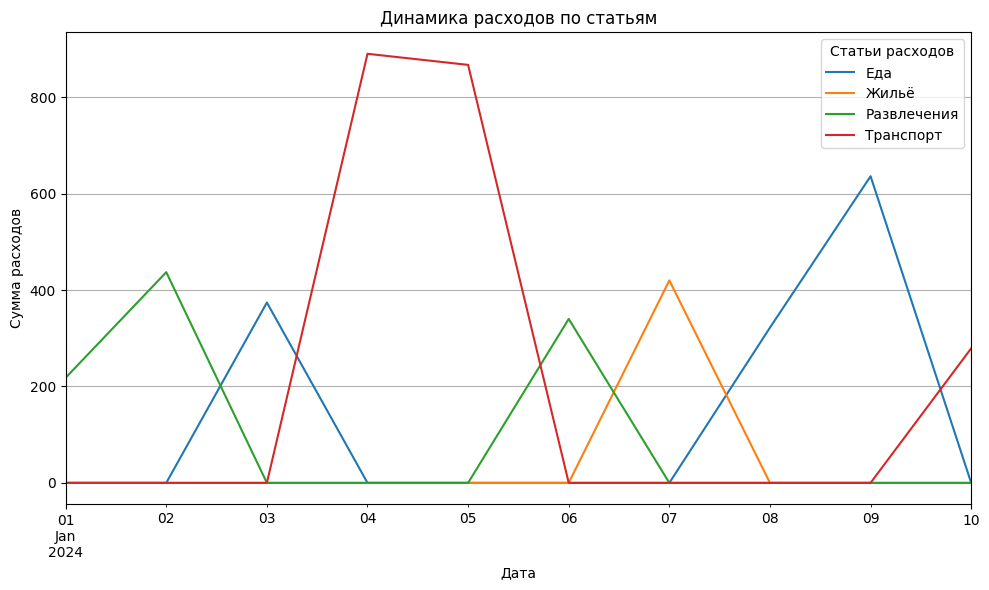

In [ ]:
# Построение линейного графика
pivot_detailed.plot(figsize=(10, 6))#Строим график для сводной таблицы размером 10 на 6
plt.title('Динамика расходов по статьям')#Устанавливаем заголовок к графику
plt.xlabel('Дата')#Устанавливаем метку по оси Х
plt.ylabel('Сумма расходов')#Устанавливаем метку по оси У
plt.legend(title='Статьи расходов')#Добавляем легенду с заголовком для обозначения статей расходов
plt.grid()#Включаем сетку для улучшения читаемости графика
plt.tight_layout()#Автоматически подгоняем параметры макета,чтобы не было наложения
plt.show()#Показываем построенный график

**Построение гистограммы:**

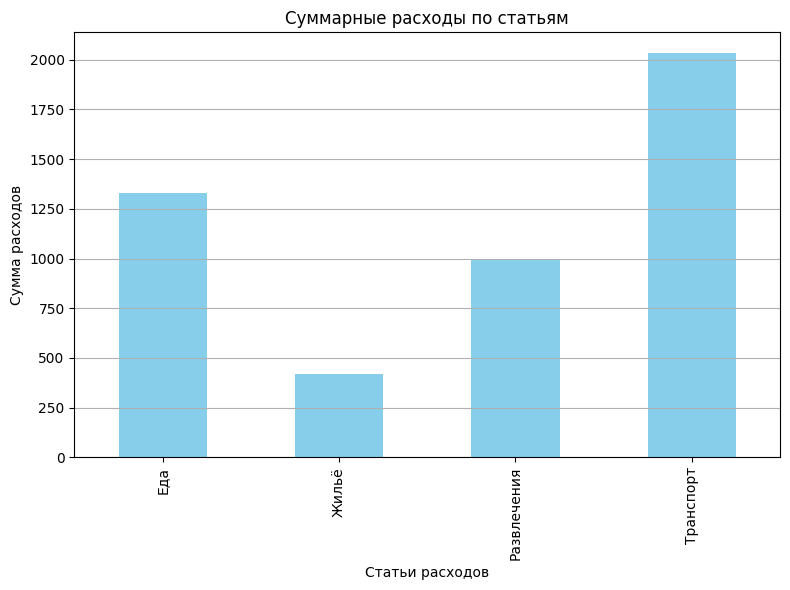

In [ ]:
# Суммарные расходы по статьям
total_by_category = detailed_expenses.groupby('Статья расходов')['Сумма'].sum()

# Построение гистограммы
total_by_category.plot(kind='bar', figsize=(8, 6), color='skyblue')#Строим столбчатую диаграмму размером 8 на 6 голубого цвета
plt.title('Суммарные расходы по статьям')#Устанавливаем заголовок
plt.xlabel('Статьи расходов')#Устанавливаем метку по оси Х
plt.ylabel('Сумма расходов')#Устанавливаем метку по оси Х
plt.grid(axis='y')#Включааем сетку по оси У для улучшения читаемости гистограммы
plt.tight_layout()#Автоматически подгоняем параметры графика,чтобы не было наложения
plt.show()#Показываем гистограмму

**Вывод:**

Сформирована таблица с детализацией расходов по статьям и датам.
Линейный график продемонстрировал изменения расходов с течением времени для каждой статьи.
Гистограмма отразила вклад каждой статьи в общую сумму расходов.

**Таблица 4: Расходы на каждого члена семьи с детализацией**

In [ ]:
# Группировка данных: расходы на каждого члена семьи по статьям
detailed_family_expenses = df.groupby(['Член семьи', 'Статья расходов'])['Сумма'].sum().reset_index()

# Создание сводной таблицы для анализа
pivot_family_details = detailed_family_expenses.pivot_table(
    values='Сумма',
    index='Член семьи',
    columns='Статья расходов',
    aggfunc='sum',
    fill_value=0
)

# Отображение таблицы
print("Таблица 4: Расходы на каждого члена семьи с детализацией")
print(pivot_family_details)

Таблица 4: Расходы на каждого члена семьи с детализацией
Статья расходов  Еда  Жильё  Развлечения  Транспорт
Член семьи                                         
Алексей          636      0            0        890
Дмитрий            0      0          777        867
Мария              0      0          218          0
Общие            696    420            0        279


**2. Визуализация данных**

Для лучшего анализа данных визуализируем:

Гистограмма с группировкой: для отображения расходов по членам семьи и статьям. Тепловая карта: для анализа распределения расходов.

**Построение гистограммы:**

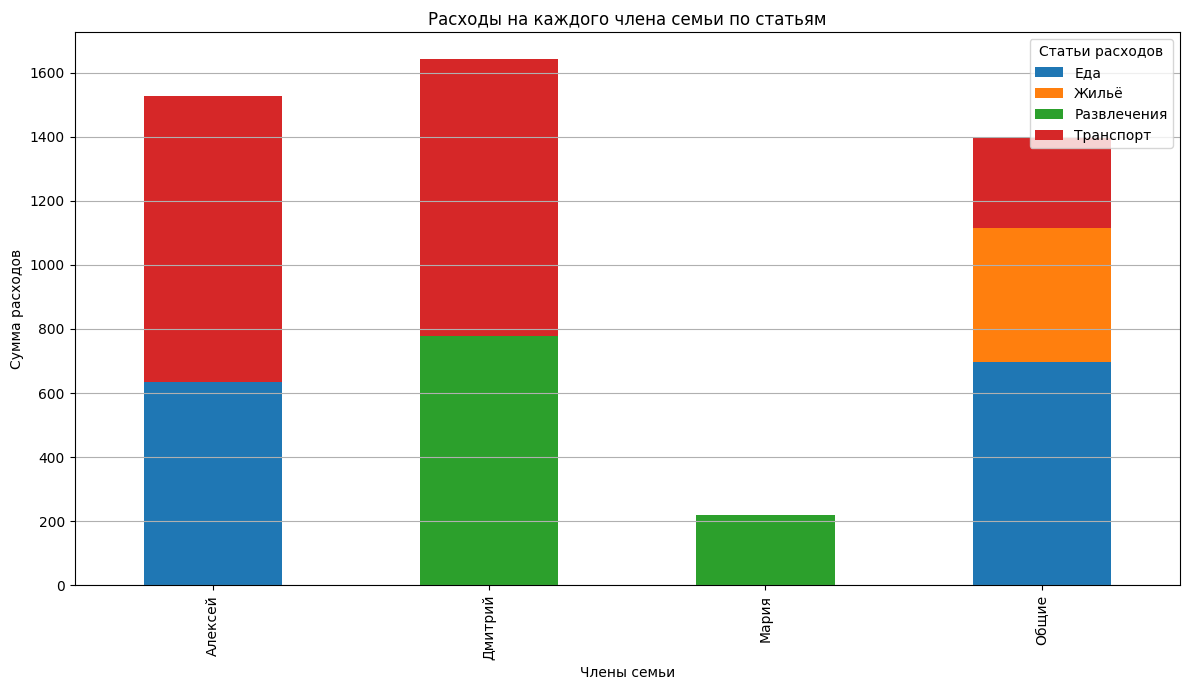

In [ ]:
# Построение гистограммы с группировкой
pivot_family_details.plot(kind='bar', figsize=(12, 7), stacked=True)#Строим столбчатую диаграмму размером 12 на 7
plt.title('Расходы на каждого члена семьи по статьям')#Устанавливаем заголовок
plt.xlabel('Члены семьи')#Устанавливаем метку по оси Х
plt.ylabel('Сумма расходов')#Устанавливаем метку по оси У
plt.legend(title='Статьи расходов')#Добавляем легенду с заголовком для обозначения статей расходов
plt.grid(axis='y')#Включаем сетку по оси У для улучшения читаемости графика
plt.tight_layout()#Автоматически подгоняем параметры макета, чтобы избежать наложения
plt.show()#Показываем погстроенный график

**Построение тепловой карты**

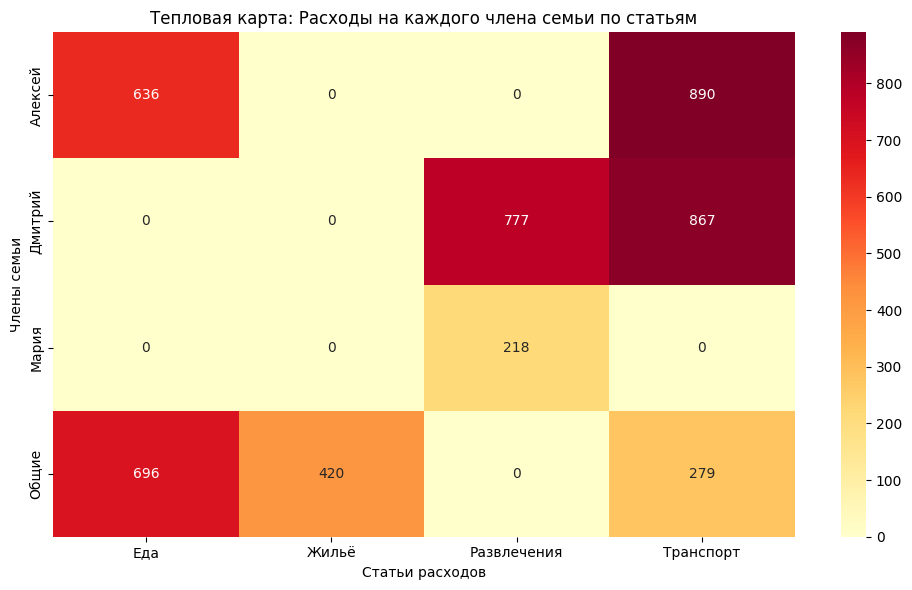

In [ ]:
# Построение тепловой карты
import seaborn as sns#Импорт необходимой библиотеки

plt.figure(figsize=(10, 6))#Строим фигуру размером 10 на 6
sns.heatmap(pivot_family_details, annot=True, fmt=".0f", cmap="YlOrRd")#Создаем тепловую карту желтого,оранжевого и красного цветов
plt.title('Тепловая карта: Расходы на каждого члена семьи по статьям')#Устанавливаем заголовок
plt.xlabel('Статьи расходов')#Устанавливаем метку пио оси Х
plt.ylabel('Члены семьи')#Устанавливаем метку по оси У
plt.tight_layout()#Автоматически подгоняем параметры макета,чтобы избежать наложения
plt.show()#Показываем полученную тепловую карту

**Результаты:**

Сводная таблица представила детализированные расходы по членам семьи и статьям расходов.
Гистограмма показала долю расходов каждого члена семьи в различных категориях. Тепловая карта визуально выделила статьи и члена семьи с наибольшими затратами.

**Анализ доходов семьи в разные периоды времени**

**Для анализа доходов необходимо:**

Создать таблицу с информацией о доходах каждого члена семьи по периодам.
Провести агрегацию данных: суммировать доходы за указанные периоды.
Выполнить визуализацию динамики доходов, чтобы выявить изменения и тренды.

**Шаги реализации:**

Подготовка данных о доходах
Создадим таблицу, аналогичную таблице расходов, с добавлением временного периода.

In [ ]:
# Пример данных о доходах семьи
income_data = {
    'Дата': pd.date_range(start='2024-01-01', periods=12, freq='M'),
    'Член семьи': np.random.choice(['Алексей', 'Мария', 'Дмитрий', 'Общие'], size=12),
    'Доход': np.random.randint(500, 5000, size=12)
}

df_income = pd.DataFrame(income_data)

# Отображение данных
print("Данные о доходах семьи:")
print(df_income)

Данные о доходах семьи:
         Дата Член семьи  Доход
0  2024-01-31    Дмитрий   2435
1  2024-02-29      Общие   1760
2  2024-03-31    Дмитрий   3982
3  2024-04-30      Общие   4723
4  2024-05-31      Мария   3394
5  2024-06-30      Общие    556
6  2024-07-31      Общие   4141
7  2024-08-31    Алексей   2615
8  2024-09-30      Общие   3226
9  2024-10-31    Дмитрий   4721
10 2024-11-30      Мария   4440
11 2024-12-31    Дмитрий   4171


<ipython-input-15-d8cba38131ed>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Дата': pd.date_range(start='2024-01-01', periods=12, freq='M'),


**2. Группировка данных по временным периодам**

Сгруппируем данные по членам семьи и месяцам для анализа доходов.

In [ ]:
# Группировка доходов по членам семьи и периодам
income_by_family = df_income.groupby(['Дата', 'Член семьи'])['Доход'].sum().unstack(fill_value=0)

# Отображение таблицы
print("Доходы семьи по периодам:")
print(income_by_family)

Доходы семьи по периодам:
Член семьи  Алексей  Дмитрий  Мария  Общие
Дата                                      
2024-01-31        0     2435      0      0
2024-02-29        0        0      0   1760
2024-03-31        0     3982      0      0
2024-04-30        0        0      0   4723
2024-05-31        0        0   3394      0
2024-06-30        0        0      0    556
2024-07-31        0        0      0   4141
2024-08-31     2615        0      0      0
2024-09-30        0        0      0   3226
2024-10-31        0     4721      0      0
2024-11-30        0        0   4440      0
2024-12-31        0     4171      0      0


**3. Визуализация данных**

Используем графики для наглядного представления доходов семьи:

Линейный график: динамика доходов по времени.
Гистограмма: сравнение доходов между членами семьи.
Построение линейного графика:

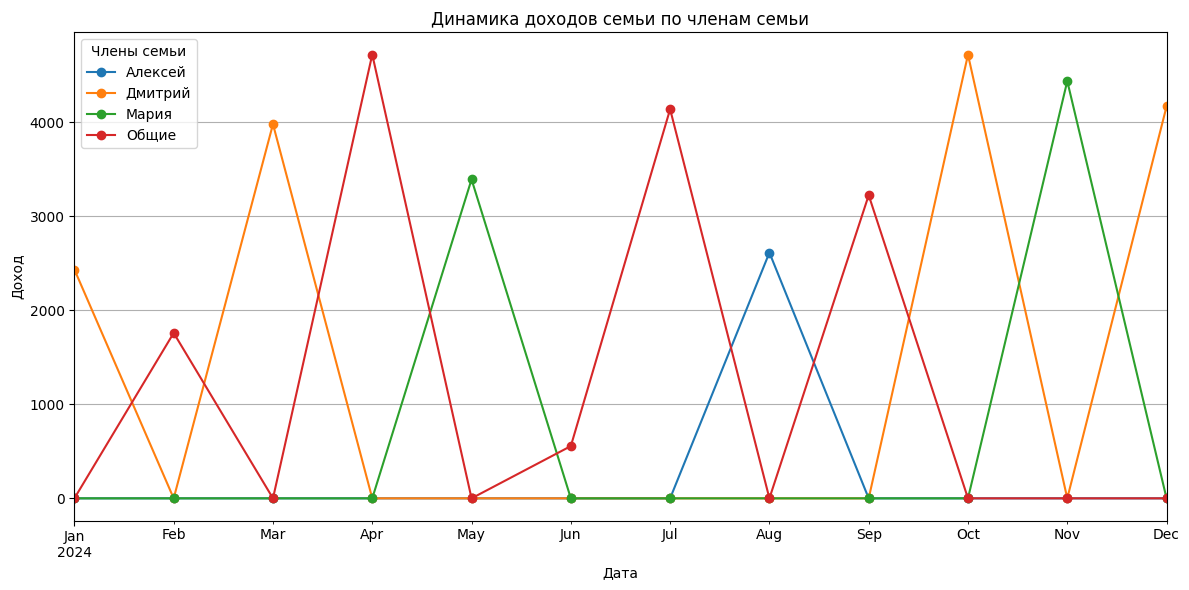

In [ ]:
# Линейный график доходов семьи
income_by_family.plot(figsize=(12, 6), marker='o')#Cтроим линейный график размером 12 на 6
plt.title('Динамика доходов семьи по членам семьи')#Устанавливаем заголовок графика
plt.xlabel('Дата')#Устанавливаем метку по оси Х
plt.ylabel('Доход')#Устанавливаем метку по оси У
plt.legend(title='Члены семьи')#Добавляем легенду с заголовком для обозначения членов семьи
plt.grid()#Включаем сетку для улучшения читаемости
plt.tight_layout()#Автоматически подгоняем параметры макеты,чтобы избежать наложения
plt.show()#Показываем построенный график

**Результаты:**

Сводная таблица показала доходы каждого члена семьи по месяцам.

Линейный график продемонстрировал динамику доходов семьи, позволив выявить пики и падения доходов в разные месяцы.

Гистограмма отразила вклад каждого члена семьи в общий доход за весь анализируемый период.

Переход от журнала регистрации к журналу операций

**Таблица 5: Доходы**

В этой таблице анализируется структура доходов семьи. Основные задачи:

Разделить доходы на категории (например, зарплата, дополнительный доход, инвестиции).
Провести визуализацию данных для анализа распределения доходов
**Шаги выполнения:**

Подготовка данных Создадим таблицу доходов с полями:
Дата: Дата получения дохода.

Источник дохода: Категория дохода (например, "Зарплата", "Дополнительный доход").
Член семьи: Кто получил доход.
Сумма: Размер дохода.

In [ ]:
# Пример данных о доходах
income_data = {
    'Дата': pd.date_range(start='2024-01-01', periods=20, freq='D'),
    'Источник дохода': np.random.choice(['Зарплата', 'Дополнительный доход', 'Инвестиции'], size=20),
    'Член семьи': np.random.choice(['Алексей', 'Мария', 'Дмитрий'], size=20),
    'Сумма': np.random.randint(500, 5000, size=20)
}

df_income = pd.DataFrame(income_data)

# Отображение данных
print("Таблица доходов:")
print(df_income)

Таблица доходов:
         Дата       Источник дохода Член семьи  Сумма
0  2024-01-01            Инвестиции    Дмитрий   2492
1  2024-01-02              Зарплата    Алексей   2187
2  2024-01-03            Инвестиции      Мария   2758
3  2024-01-04  Дополнительный доход    Дмитрий   1568
4  2024-01-05            Инвестиции    Алексей   2759
5  2024-01-06  Дополнительный доход      Мария   3554
6  2024-01-07              Зарплата    Алексей   2254
7  2024-01-08            Инвестиции    Дмитрий   2661
8  2024-01-09              Зарплата      Мария   2473
9  2024-01-10  Дополнительный доход    Дмитрий   2325
10 2024-01-11            Инвестиции    Алексей   3847
11 2024-01-12            Инвестиции      Мария   2650
12 2024-01-13  Дополнительный доход    Дмитрий   4584
13 2024-01-14              Зарплата    Дмитрий   3493
14 2024-01-15              Зарплата    Дмитрий   2039
15 2024-01-16            Инвестиции    Дмитрий   4199
16 2024-01-17              Зарплата      Мария   2299
17 2024-01-

**Анализ доходов**

Сгруппируем данные для расчёта общей суммы доходов по источникам и членам семьи.

In [ ]:
# Суммарные доходы по источникам
total_income_by_source = df_income.groupby('Источник дохода')['Сумма'].sum()

# Суммарные доходы по членам семьи
total_income_by_family = df_income.groupby('Член семьи')['Сумма'].sum()

# Отображение результатов
print("\nСумма доходов по источникам:")
print(total_income_by_source)

print("\nСумма доходов по членам семьи:")
print(total_income_by_family)


Сумма доходов по источникам:
Источник дохода
Дополнительный доход    16739
Зарплата                15703
Инвестиции              24125
Name: Сумма, dtype: int64

Сумма доходов по членам семьи:
Член семьи
Алексей    12005
Дмитрий    23361
Мария      21201
Name: Сумма, dtype: int64


**Визуализация данных**

Круговая диаграмма доходов по источникам:

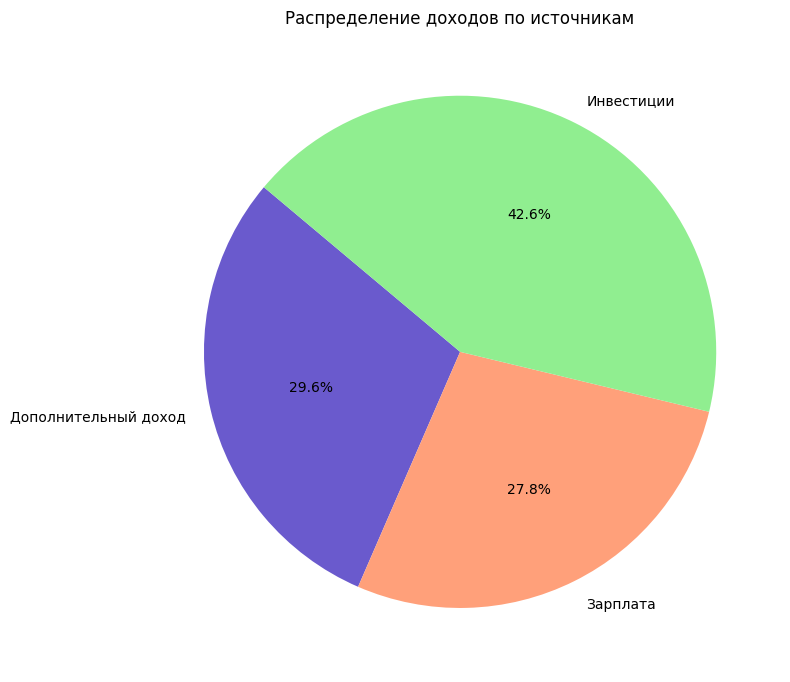

In [ ]:
# Построение круговой диаграммы
total_income_by_source.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=140, colors=['#6A5ACD', '#FFA07A', '#90ee90'])#Строим круговую диаграмму
plt.title('Распределение доходов по источникам')#Устанавливаем заголовок
plt.ylabel('')# Убираем ось Y
plt.tight_layout()#Автоматически подгоняем параметры макета,чтобы избежать наложения
plt.show()#Показываем график

**Гистограмма доходов по членам семьи:**

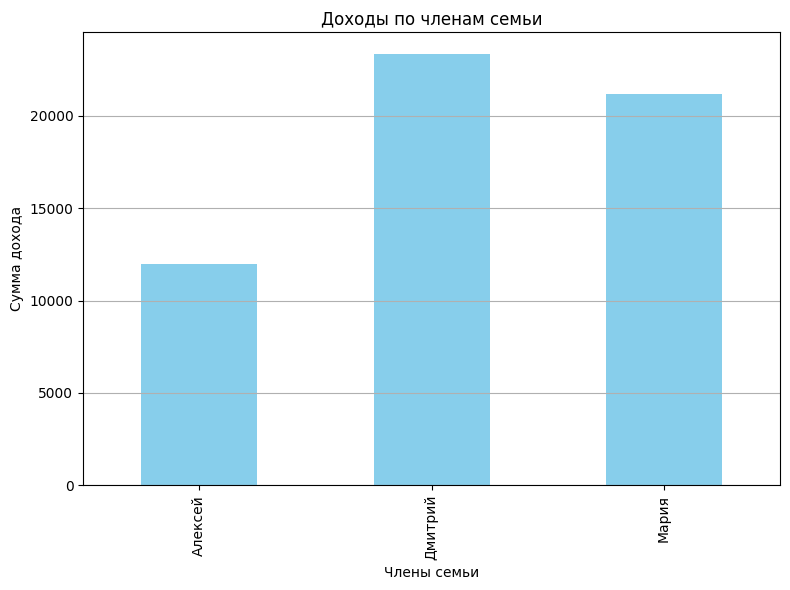

In [ ]:
# Построение гистограммы
total_income_by_family.plot(kind='bar', color='skyblue', figsize=(8, 6))#Строим столбчатую диаграмму размером 8 на 6 голубого цвета
plt.title('Доходы по членам семьи')#Устанавливаем заголовок
plt.xlabel('Члены семьи')#Устанавливаем метку по оси Х
plt.ylabel('Сумма дохода')#Устанавливаем метку по оси У
plt.grid(axis='y')#Включаем сетку по оси У для улучшения читаемости
plt.tight_layout()#Автоматически подгоняем параметры метки,чтобы избежать наложения
plt.show()#Выводим построенную гистограмму

**Результаты:**

Сводная таблица представила структуру доходов по источникам и членам семьи.
Круговая диаграмма визуализировала долю каждого источника дохода.
Гистограмма отразила вклад каждого члена семьи в общий доход.